# 당일뉴스 키워드 뽑기

In [3]:
import pandas as pd
import numpy as np
import os
from keybert import KeyBERT

In [190]:
df_today = pd.read_csv('./data/당일뉴스/0422_news.csv',index_col=0)
df_today

,company,title,content,Date
0,By Reuters,"Global energy crisis, Russia invasion eclipse ...","As a candidate, Joe Biden made climate change ...",2022-04-22
1,By Reuters,"Oil edges higher on concerns over Russia, Liby...",By David Gaffen\nNEW YORK (Reuters) -Oil price...,2022-04-22
2,By Investing.com,Oil Snaps 2-Day Slide as Supply Issues Back in...,By Barani Krishnan\nInvesting.com -- Oil price...,2022-04-22
3,By Bloomberg,Gasoline Imports Flowing to U.S. West Coast at...,(Bloomberg) -- The U.S. West Coast is importin...,2022-04-22
4,By Reuters,"U.S. companies can help rebuild Ukraine, head ...",U.S. companies can help rebuild Ukraine with d...,2022-04-22
...,...,...,...,...
252,By Reuters,"Johnny Depp says ex-wife Heard beat him, cost ...",suddenly in my 50s,2022-04-22
253,By Reuters,G7 finance ministers pledge more than $24 bill...,G7 finance ministers said they have provided a...,2022-04-22
254,By Reuters,South Carolina court halts first firing-squad ...,By Jonathan Allen\n(Reuters) -South Carolina's...,2022-04-22
255,By Reuters,Biden hosts military chiefs as Ukraine crisis ...,President Joe Biden convened U.S. military lea...,2022-04-22


In [193]:
# 파일 하나일 경우

df = pd.read_csv('./data/당일뉴스/0422_news.csv',index_col=0)
df.dropna(inplace=True)
df.reset_index(drop=True)
        
kw_model = KeyBERT()

date_list = []
kw_list = []
kw_list_only = []

# df의 모든 행에 대해
for n in range(len(df)):

    # 날짜 
    date_list.append(df['Date'].iloc[n])

    # diversity 0.4, 키워드 50개 추출
    keywords_list = kw_model.extract_keywords(df['content'].iloc[n], keyphrase_ngram_range=(1,1),
                                     use_mmr=True,diversity=0.4, nr_candidates=50, top_n=50)

    # (키워드 +유사성) 유사성 높은순으로 정렬
    keywords_sorted = sorted(keywords_list, key= lambda keywords_list: keywords_list[1], reverse=True)
    kw_list.append(keywords_sorted)

    # 키워드만 모으기
    temp_list = []
    for idx in range(len(keywords_sorted)):
        temp_list.append(keywords_sorted[idx][0])

    kw_list_only.append(temp_list)


df_kw = pd.DataFrame({'Date':date_list, 'keywords,similarity': kw_list, "keywords": kw_list_only})
df_kw.to_csv('./data/당일키워드/keyword_0422.csv')

In [ ]:
# 폴더별로 데이터 들어올경우

topics = ['stock-market-news', 'commodities-news', 'forex-news', 'economy', 'economic-indicators','politics','world-news']

# 당일 뉴스 데이터 경로
path = './data/'
result_path = './data/keyword_result/'

for topic in topics[2:4]:
    path_topic = os.path.join(path,topic)
    path_result = os.path.join(result_path,topic)
    file_list = os.listdir(path_topic)
    file_num = len(os.listdir(path_topic))
    
    # 저장폴더 만들기
    if not os.path.exists(path_result):
        os.makedirs(path_result)
    else:
        pass

    for i in range(file_num):  # 원래는 file_num
        
        df = pd.read_csv(path_topic + '/' + file_list[i])
        df.dropna(inplace=True)
        df.reset_index(drop=True)
        
        kw_model = KeyBERT()
        
        date_list = []
        kw_list = []
        kw_list_only = []
        
        # df의 모든 행에 대해
        for n in range(len(df)):
            
            # 날짜 
            date_list.append(df['date'].iloc[n])
            
            # diversity 0.4, 키워드 50개 추출
            keywords_list = kw_model.extract_keywords(df['content'].iloc[n], keyphrase_ngram_range=(1,1),
                                             use_mmr=True,diversity=0.4, nr_candidates=50, top_n=50)
            
            # (키워드 +유사성) 유사성 높은순으로 정렬
            keywords_sorted = sorted(keywords_list, key= lambda keywords_list: keywords_list[1], reverse=True)
            kw_list.append(keywords_sorted)
            
            # 키워드만 모으기
            temp_list = []
            for idx in range(len(keywords_sorted)):
                temp_list.append(keywords_sorted[idx][0])
                
            kw_list_only.append(temp_list)

        
        df_kw = pd.DataFrame({'Date':date_list, 'keywords,similarity': kw_list, "keywords": kw_list_only})
        df_kw.to_csv('./data/keyword_result/{}/keyword_{}_{}.csv'.format(topic, topic,i))

# 뽑은 키워드 전처리

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

In [4]:
df_kw = pd.read_csv('./data/당일키워드/keyword_0422.csv',index_col=0)
df_kw.head()

,Date,"keywords,similarity",keywords
0,2022-04-22,"[('biden', 0.4685), ('fuels', 0.3992), ('oil',...","['biden', 'fuels', 'oil', 'warming', 'demand',..."
1,2022-04-22,"[('futures', 0.4365), ('brent', 0.4083), ('oil...","['futures', 'brent', 'oil', 'petroleum', 'crud..."
2,2022-04-22,"[('oil', 0.378), ('crude', 0.3364), ('brent', ...","['oil', 'crude', 'brent', 'wti', 'opec', 'pric..."
3,2022-04-22,"[('refinery', 0.5331), ('chevron', 0.3951), ('...","['refinery', 'chevron', 'gasoline', 'refinerie..."
4,2022-04-22,"[('ukraine', 0.4884), ('ukrainian', 0.425), ('...","['ukraine', 'ukrainian', 'funding', 'shevchenk..."


In [8]:
df_kw['keywords,similarity'][0]

"[('biden', 0.4685), ('fuels', 0.3992), ('oil', 0.3851), ('warming', 0.3707), ('demand', 0.3241), ('energy', 0.3094), ('geopolitical', 0.3016), ('drilling', 0.2697), ('campaign', 0.2679), ('candidate', 0.2596), ('climate', 0.2593), ('conservatives', 0.2431), ('reserves', 0.2416), ('president', 0.2337), ('pump', 0.2325), ('prices', 0.2279), ('inflation', 0.2269), ('economist', 0.2233), ('joe', 0.2214), ('forecast', 0.2208), ('strategic', 0.2149), ('policy', 0.2142), ('war', 0.1919), ('decades', 0.1732), ('reform', 0.1718), ('promising', 0.1674), ('pay', 0.1672), ('progressives', 0.1668), ('gain', 0.1593), ('prioritize', 0.152), ('short', 0.1502), ('leading', 0.1453), ('decarbonize', 0.1351), ('keeping', 0.1344), ('headwinds', 0.1261), ('end', 0.1249), ('fossil', 0.1215), ('reality', 0.1092), ('november', 0.1065), ('ed', 0.0964), ('forced', 0.092), ('jarring', 0.0914), ('urge', 0.0868), ('hirs', 0.0766), ('difficulties', 0.0757), ('rampant', 0.0718), ('sure', 0.0643), ('fellow', 0.0629),

In [196]:
df_kw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 257 non-null    object
 1   keywords,similarity  257 non-null    object
 2   keywords             257 non-null    object
dtypes: object(3)
memory usage: 8.0+ KB


In [197]:
words = df_kw['keywords'][0]
words

"['biden', 'fuels', 'oil', 'warming', 'demand', 'energy', 'geopolitical', 'drilling', 'campaign', 'candidate', 'climate', 'conservatives', 'reserves', 'president', 'pump', 'prices', 'inflation', 'economist', 'joe', 'forecast', 'strategic', 'policy', 'war', 'decades', 'reform', 'promising', 'pay', 'progressives', 'gain', 'prioritize', 'short', 'leading', 'decarbonize', 'keeping', 'headwinds', 'end', 'fossil', 'reality', 'november', 'ed', 'forced', 'jarring', 'urge', 'hirs', 'difficulties', 'rampant', 'sure', 'fellow', 'instead', 'curb']"

In [198]:
import re
kw_list = re.sub('[^A-Za-z ]',"",words).split()
kw_list

['biden',
 'fuels',
 'oil',
 'warming',
 'demand',
 'energy',
 'geopolitical',
 'drilling',
 'campaign',
 'candidate',
 'climate',
 'conservatives',
 'reserves',
 'president',
 'pump',
 'prices',
 'inflation',
 'economist',
 'joe',
 'forecast',
 'strategic',
 'policy',
 'war',
 'decades',
 'reform',
 'promising',
 'pay',
 'progressives',
 'gain',
 'prioritize',
 'short',
 'leading',
 'decarbonize',
 'keeping',
 'headwinds',
 'end',
 'fossil',
 'reality',
 'november',
 'ed',
 'forced',
 'jarring',
 'urge',
 'hirs',
 'difficulties',
 'rampant',
 'sure',
 'fellow',
 'instead',
 'curb']

## 상위 10개 단어만 모으는 함수 적용

In [199]:
def kw_tolist(words):
    num = 10
    kw_list = re.sub('[^A-Za-z ]',"",words).split()
    return kw_list[:num] 

In [200]:
df_kw['kw_list'] = df_kw['keywords'].apply(kw_tolist)

In [201]:
df_kw['kw_list'][0]

['biden',
 'fuels',
 'oil',
 'warming',
 'demand',
 'energy',
 'geopolitical',
 'drilling',
 'campaign',
 'candidate']

# 당일 키워드 합치기

In [202]:
today_kw =  df_kw['kw_list'].sum()
today_kw

['biden',
 'fuels',
 'oil',
 'warming',
 'demand',
 'energy',
 'geopolitical',
 'drilling',
 'campaign',
 'candidate',
 'futures',
 'brent',
 'oil',
 'petroleum',
 'crude',
 'fuels',
 'opec',
 'barrels',
 'traders',
 'prices',
 'oil',
 'crude',
 'brent',
 'wti',
 'opec',
 'prices',
 'barrels',
 'traders',
 'investing',
 'bullish',
 'refinery',
 'chevron',
 'gasoline',
 'refineries',
 'coast',
 'oil',
 'cvx',
 'barrels',
 'maintenance',
 'exports',
 'ukraine',
 'ukrainian',
 'funding',
 'shevchenko',
 'banking',
 'financing',
 'aid',
 'finances',
 'fund',
 'infrastructure',
 'corn',
 'agriculture',
 'grain',
 'forecasts',
 'futures',
 'crop',
 'planting',
 'produce',
 'commodity',
 'production',
 'exxon',
 'petroleum',
 'emissions',
 'co',
 'carbon',
 'renewable',
 'fuel',
 'gm',
 'mobil',
 'pipeline',
 'nyse',
 'nasdaq',
 'boeing',
 'bp',
 'apple',
 'aapl',
 'rdsa',
 'ba',
 'shell',
 'equinor',
 'opec',
 'oil',
 'prices',
 'imfc',
 'sanctions',
 'brent',
 'inflation',
 'imf',
 'reuters

In [203]:
# 당일 키워드 개수
len(today_kw)

2524

# 워드클라우드 만들기

In [204]:
c = Counter(today_kw)
c

Counter({'biden': 15,
         'fuels': 4,
         'oil': 17,
         'warming': 1,
         'demand': 9,
         'energy': 5,
         'geopolitical': 1,
         'drilling': 3,
         'campaign': 6,
         'candidate': 1,
         'futures': 12,
         'brent': 4,
         'petroleum': 5,
         'crude': 6,
         'opec': 7,
         'barrels': 4,
         'traders': 3,
         'prices': 18,
         'wti': 1,
         'investing': 27,
         'bullish': 1,
         'refinery': 1,
         'chevron': 2,
         'gasoline': 2,
         'refineries': 1,
         'coast': 1,
         'cvx': 1,
         'maintenance': 1,
         'exports': 9,
         'ukraine': 33,
         'ukrainian': 1,
         'funding': 5,
         'shevchenko': 1,
         'banking': 4,
         'financing': 6,
         'aid': 6,
         'finances': 1,
         'fund': 8,
         'infrastructure': 3,
         'corn': 1,
         'agriculture': 1,
         'grain': 1,
         'forecasts': 16,
 

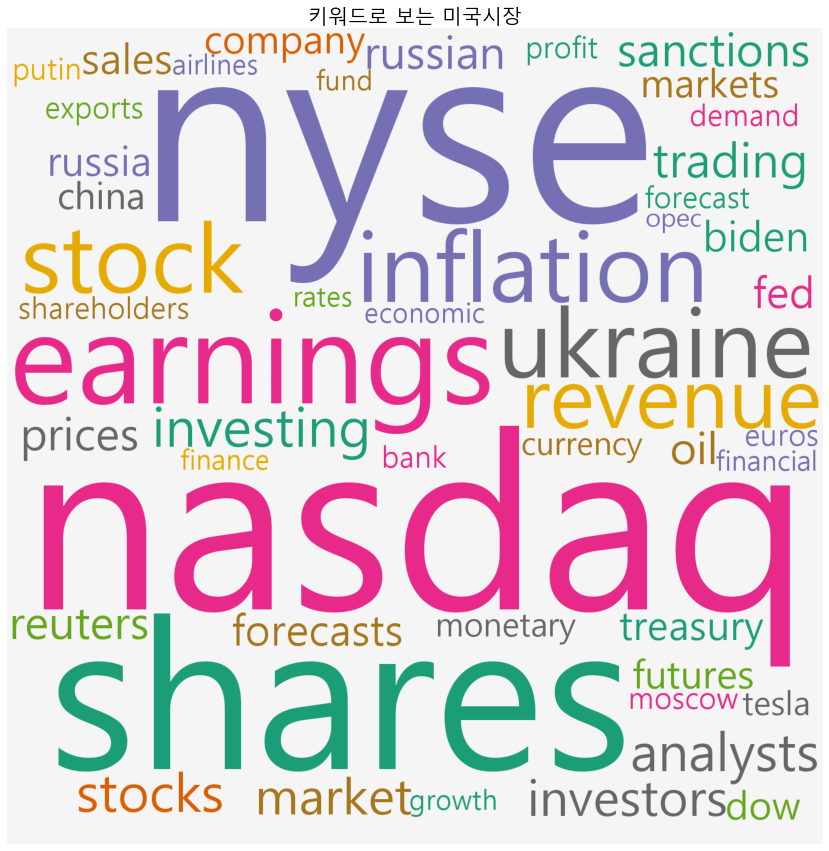

In [205]:

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

c = Counter(today_kw)
wc = WordCloud(font_path='malgun', width=800, height=800, max_font_size=250, colormap='Dark2',scale=2.0,font_step=4,
               background_color='whitesmoke', prefer_horizontal = True, max_words=50, random_state=1)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(15,15))

plt.title("키워드로 보는 미국시장", size = 20)
plt.axis('off') # 그래프 축 제거
plt.imshow(gen)

In [102]:
# colormap 종류

# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

# plot_color_gradients('Sequential (2)',
#                      ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
#                       'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
#                       'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

                     
# plot_color_gradients('Qualitative',
#                      ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
#                       'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
#                       'tab20c'])

# 워드클라우드 작동코드

C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\21ckw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45716 missing from c

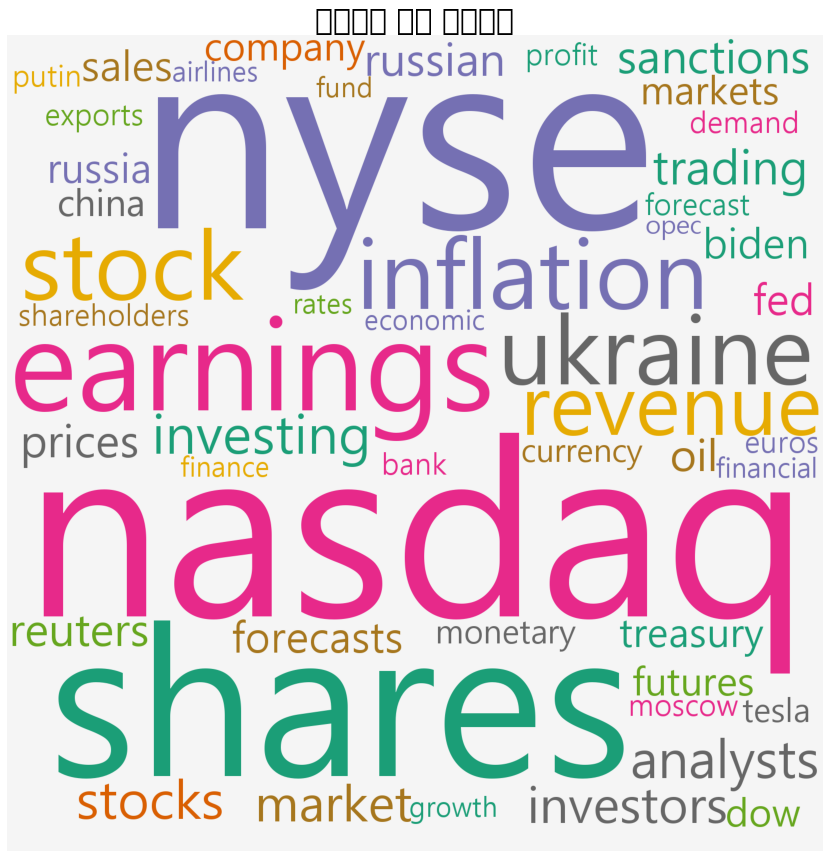

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# 파일경로 설정해줘야 함
df_kw = pd.read_csv('./data/당일키워드/keyword_0422.csv',index_col=0)

# 기사당 키워드 10개 뽑는 함수
def kw_tolist(words):
    num = 10
    kw_list = re.sub('[^A-Za-z ]',"",words).split()
    return kw_list[:num] 

df_kw['kw_list'] = df_kw['keywords'].apply(kw_tolist)

#당일 키워드 전체
today_kw =  df_kw['kw_list'].sum()

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

c = Counter(today_kw)
wc = WordCloud(font_path='malgun', width=800, height=800, max_font_size=250, colormap='Dark2',scale=2.0,font_step=4,
               background_color='whitesmoke', prefer_horizontal = True, max_words=50, random_state=1)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(15,15))

plt.title("키워드로 보는 미국시장", size = 30)
plt.axis('off') # 그래프 축 제거
plt.imshow(gen)

# 단어빈도수 bar chart

In [182]:
# 빈도수 기준으로 내림차순 정렬
c1 = sorted(c.items(),reverse=True, key=lambda x: x[1])
c1[:5]

[('oil', 814),
 ('futures', 567),
 ('crude', 494),
 ('opec', 416),
 ('prices', 410)]

In [176]:
c1[0][0]

'oil'

In [177]:
# 상위 50개 단어만 리스트에 담기
num = 50
words = []
counts = []
for i in range(num):
    words.append(c1[i][0])
    counts.append(c1[i][1])

In [178]:
print(words[:5])
print(counts[:5])

['oil', 'futures', 'crude', 'opec', 'prices']
[814, 567, 494, 416, 410]


In [179]:
words_r = reversed(words)
list(words_r)

['energy',
 'forecast',
 'saudi',
 'yields',
 'reserves',
 'supply',
 'omicron',
 'refinery',
 'stockpiles',
 'trading',
 'nyse',
 'diesel',
 'forecasts',
 'traders',
 'market',
 'emissions',
 'biden',
 'russia',
 'putin',
 'bloomberg',
 'commodity',
 'dollar',
 'wti',
 'treasury',
 'fuels',
 'gas',
 'stocks',
 'fed',
 'commodities',
 'moscow',
 'investing',
 'gasoline',
 'fuel',
 'russian',
 'reuters',
 'exports',
 'ukraine',
 'gold',
 'demand',
 'markets',
 'inflation',
 'brent',
 'barrels',
 'sanctions',
 'petroleum',
 'prices',
 'opec',
 'crude',
 'futures',
 'oil']

In [180]:
counts_r = list(reversed(counts))
counts_r

[70,
 70,
 71,
 72,
 73,
 74,
 76,
 76,
 85,
 85,
 86,
 89,
 90,
 95,
 96,
 100,
 100,
 103,
 104,
 105,
 105,
 106,
 110,
 111,
 111,
 114,
 118,
 121,
 125,
 135,
 141,
 143,
 160,
 160,
 161,
 190,
 208,
 210,
 216,
 223,
 235,
 255,
 331,
 355,
 398,
 410,
 416,
 494,
 567,
 814]

# barchart 그리기

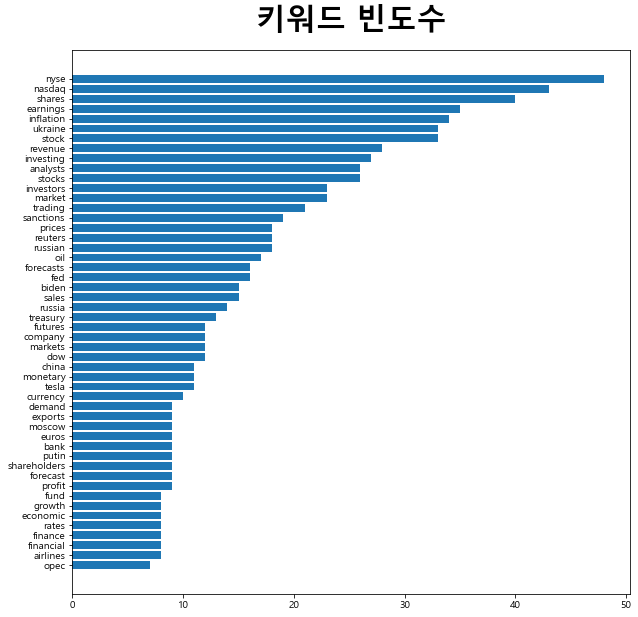

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# c 는 워드클라우드 코드에서 받아옴

# 빈도수 기준으로 내림차순 정렬
c1 = sorted(c.items(),reverse=True, key=lambda x: x[1])

# 상위 50개 단어만 리스트에 담기
num = 50
words = []
counts = []
for i in range(num):
    words.append(c1[i][0])
    counts.append(c1[i][1])


words_r = list(reversed(words))
counts_r = list(reversed(counts))

y = np.arange(50)
plt.figure(figsize=(10,10))
title_font = {
    'fontsize': 30,
    'fontweight': 'bold'}
plt.title('키워드 빈도수', fontdict=title_font, pad=20)
plt.barh(y,counts_r)
plt.yticks(y,words_r)

plt.show()